<a href="https://colab.research.google.com/github/sedaalsan/library-management-system/blob/main/25_04_2024_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_diabetes()
X = data["data"]
y = data["target"]

#print(data["DESCR"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)

(353, 10)


In [ ]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128, activation = "relu", input_shape = (X_train.shape[1], )  ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(32, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

#mdl.summary()

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mape"])
mdl.fit(X_train, y_train, epochs = 100)


In [ ]:
mdl.evaluate(X_test, y_test)

3/3 [==============================] - 1s 8ms/step - loss: 2749.1211 - mape: 35.8555


[2749.12109375, 35.85551071166992]

In [ ]:
ypred = mdl.predict(X_test)
ypred

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data["data"]
y = data["target"]

#print(data["DESCR"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)

(455, 30)


In [ ]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128, activation = "relu", input_shape = (X_train.shape[1], )  ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(32, activation = "relu"))
mdl.add(layers.Dense(1, activation = "sigmoid"))

#mdl.summary()

mdl.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs = 100)

In [ ]:
mdl.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.1631 - accuracy: 0.9737


[0.1630864292383194, 0.9736841917037964]

In [ ]:
ypred = mdl.predict(X_test)
ypred_label = (ypred > 0.5).astype("int")
ypred_label

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X = data["data"]
y = data["target"]

#print(data["DESCR"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)

(120, 4)


In [ ]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128, activation = "relu", input_shape = (X_train.shape[1], )  ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(32, activation = "relu"))
mdl.add(layers.Dense(3, activation = "softmax"))

#mdl.summary()

mdl.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs = 100)

In [ ]:
ypred = mdl.predict(X_test)
ypred_label = np.argmax(ypred, axis = 1)
ypred_label

1/1 [==============================] - 0s 35ms/step


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
df = pd.read_csv("Boston_Data.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X = df.drop("medv", axis = 1)
y = df["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)

(404, 13)


In [ ]:
mdl = keras.Sequential()
mdl.add(layers.Dense(256, activation = "relu", input_shape = (X_train.shape[1], )  ))
mdl.add(layers.Dense(256, activation = "relu"))
mdl.add(layers.Dense(256, activation = "relu"))
mdl.add(layers.Dense(256, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

#mdl.summary()
early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 50, restore_best_weights = True)


mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mape"])
history = mdl.fit(X_train, y_train, epochs = 1000, validation_split = 0.1, verbose = 0, callbacks=[early_stop])

print(mdl.evaluate(X_train, y_train))
print(mdl.evaluate(X_test, y_test))

13/13 [==============================] - 0s 4ms/step - loss: 2.4259 - mape: 5.5739
[2.425915479660034, 5.573927879333496]
4/4 [==============================] - 0s 7ms/step - loss: 9.7883 - mape: 10.7546
[9.7882661819458, 10.754568099975586]


(0.0, 20.0)

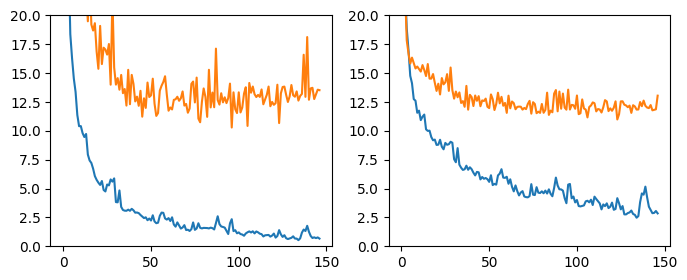

In [ ]:
plt.figure(figsize = (8,3))

plt.subplot(1,2, 1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylim([0,20])

plt.subplot(1,2, 2)

plt.plot(history.history["mape"])
plt.plot(history.history["val_mape"])
plt.ylim([0,20])


In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


5


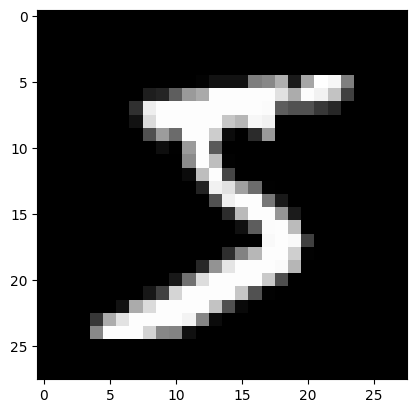

In [ ]:
plt.imshow(X_train[0], "gray")
print(y_train[0])

In [ ]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)

(60000, 784)


In [ ]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128, activation = "relu", input_shape = (X_train.shape[1], )  ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(32, activation = "relu"))
mdl.add(layers.Dense(10, activation = "softmax"))

#mdl.summary()

mdl.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2504 - accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1058 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0784 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0583 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0495 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0387 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0339 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0293 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0254 - accuracy: 0.9916
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.024

In [ ]:
mdl.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1002 - accuracy: 0.9771


[0.10017754882574081, 0.9771000146865845]

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


In [ ]:
mdl = keras.Sequential()
mdl.add(layers.Conv2D(128, kernel_size = (3,3), activation = "relu", input_shape = X_train.shape[1:]  ))
mdl.add(layers.MaxPool2D(pool_size = (2,2)))
mdl.add(layers.Conv2D(64, kernel_size = (3,3), activation = "relu"))
mdl.add(layers.MaxPool2D(pool_size = (2,2)))
mdl.add(layers.Flatten())
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(32, activation = "relu"))
mdl.add(layers.Dense(10, activation = "softmax"))

#mdl.summary()

mdl.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 14s 5ms/step - loss: 0.1459 - accuracy: 0.9543
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0486 - accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0332 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0249 - accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0200 - accuracy: 0.9940
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0159 - accuracy: 0.9950
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0139 - accuracy: 0.9958
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0098 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.

In [ ]:
mdl.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0475 - accuracy: 0.9895


[0.04751104116439819, 0.9894999861717224]

In [ ]:
ypred = mdl.predict(X_test)
ypred_label = np.argmax(ypred, axis = 1)
ypred_label

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

<BarContainer object of 10 artists>

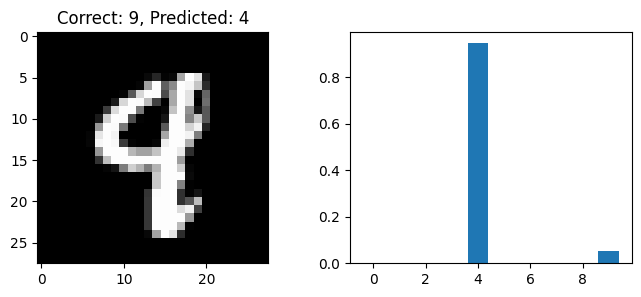

In [ ]:
ix = y_test != ypred_label
k = 3

plt.figure(figsize = (8,3))

plt.subplot(1,2,1)
plt.imshow(X_test[ix][k].reshape(28,28), "gray")
plt.title(f"Correct: {y_test[ix][k]}, Predicted: {ypred_label[ix][k]}")

plt.subplot(1,2,2)
plt.bar(np.arange(10), ypred[ix][k])

In [ ]:
df = pd.read_excel("natural_gas.xlsx")
df.head()

,Consumption,Temperature
0,551547920.0,6.741935
1,551886440.0,5.857143
2,513182950.0,7.225806
3,281495382.0,12.566667
4,138625166.0,17.225806


<Axes: >

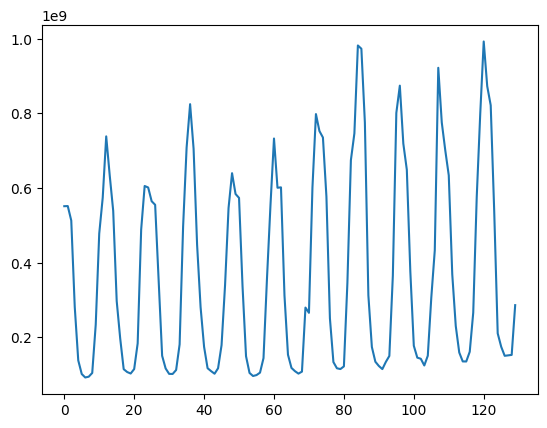

In [ ]:
consumption = df["Consumption"]
consumption.plot()

In [ ]:
mu = consumption[:-12].mean()
sigma = consumption[:-12].std()

consumption = (consumption - mu) / sigma

In [ ]:
def make_data(data, lag = 3):
    X = []
    y = []
    for i in range(len(data) - lag):
        X.append(data[i : i + lag])
        y.append(data[i + lag])

    return np.array(X), np.array(y)

X, y = make_data(consumption, lag = 12)
X = X[..., np.newaxis]
print(X.shape)
print(y.shape)

(118, 12, 1)
(118,)


In [ ]:
X_train = X[:-12]
y_train = y[:-12]
X_test = X[-12:]
y_test = y[-12:]

1/1 [==============================] - 1s 635ms/step - loss: 0.0992 - mae: 0.2263
[0.09922617673873901, 0.22633880376815796]
1/1 [==============================] - 1s 610ms/step


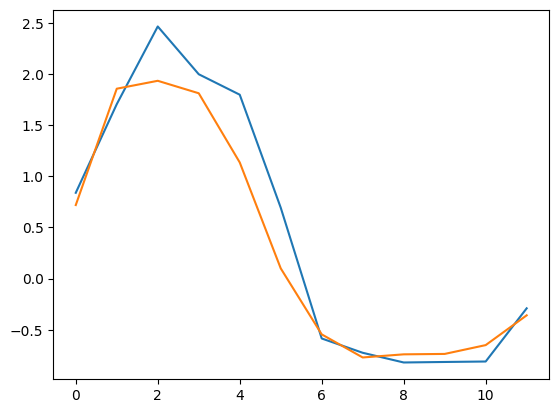

In [ ]:
mdl = keras.Sequential()

mdl.add(layers.LSTM(128, input_shape = X_train.shape[1:]  ))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])
mdl.fit(X_train, y_train, epochs = 100, verbose = 0)

print(mdl.evaluate(X_test, y_test))

ypred = mdl.predict(X_test)

plt.plot(y_test)
plt.plot(ypred)

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)

(60000, 784)


In [ ]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128, activation = "relu", input_shape = (784, ) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(32, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(784, activation = "sigmoid"))

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])
mdl.fit(X_train, X_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.0301 - mae: 0.0748
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0157 - mae: 0.0459
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0129 - mae: 0.0398
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0114 - mae: 0.0366
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0104 - mae: 0.0344
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0097 - mae: 0.0329
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0092 - mae: 0.0318
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0088 - mae: 0.0309
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0085 - mae: 0.0303
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0083 - mae: 0.0297


In [ ]:
Xpred = mdl.predict(X_test)

313/313 [==============================] - 1s 4ms/step


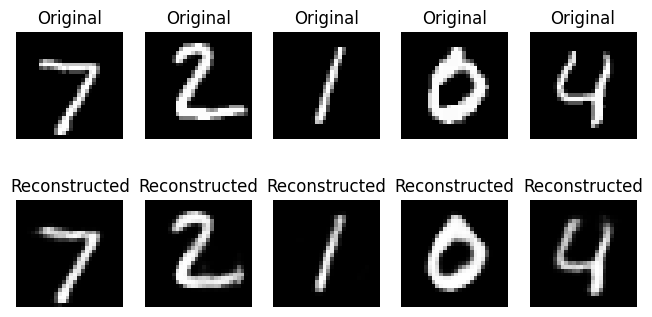

In [ ]:
plt.figure(figsize = (8,4))

for i in range(5):
    plt.subplot(2,5, i + 1)
    plt.imshow(X_test[i].reshape(28,28), "gray")
    plt.title("Original")
    plt.axis("off")

    plt.subplot(2,5, i + 1 + 5)
    plt.imshow(Xpred[i].reshape(28,28), "gray")
    plt.title("Reconstructed")
    plt.axis("off")

In [ ]:
X_train_noisy = X_train + np.random.normal(size = X_train.shape) * 0.3
X_test_noisy = X_test + np.random.normal(size = X_test.shape) * 0.3

X_train_noisy = np.clip(X_train_noisy, 0, 1)
X_test_noisy = np.clip(X_test_noisy, 0, 1)


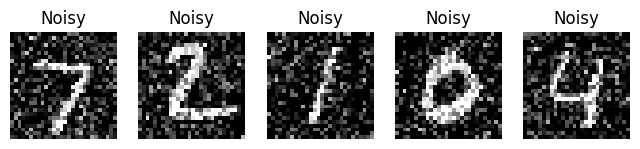

In [ ]:
plt.figure(figsize = (8,4))

for i in range(5):
    plt.subplot(1,5, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28,28), "gray")
    plt.title("Noisy")
    plt.axis("off")

In [ ]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128, activation = "relu", input_shape = (784, ) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(32, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(784, activation = "sigmoid"))

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])
mdl.fit(X_train_noisy, X_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0362 - mae: 0.0878
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0216 - mae: 0.0587
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0186 - mae: 0.0524
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0171 - mae: 0.0491
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0161 - mae: 0.0471
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0153 - mae: 0.0454
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0147 - mae: 0.0441
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0142 - mae: 0.0430
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0138 - mae: 0.0422
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0135 - mae: 0.0415


In [ ]:
Xpred = mdl.predict(X_test_noisy)

313/313 [==============================] - 1s 3ms/step


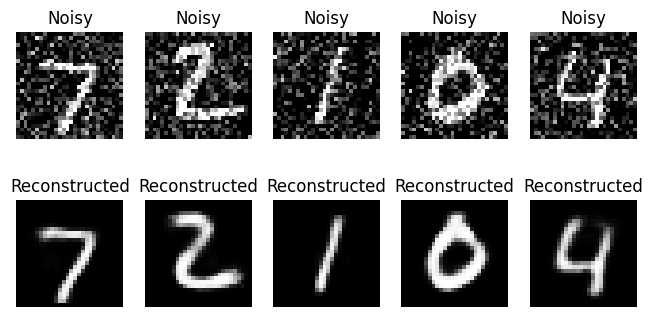

In [ ]:
plt.figure(figsize = (8,4))

for i in range(5):
    plt.subplot(2,5, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28,28), "gray")
    plt.title("Noisy")
    plt.axis("off")

    plt.subplot(2,5, i + 1 + 5)
    plt.imshow(Xpred[i].reshape(28,28), "gray")
    plt.title("Reconstructed")
    plt.axis("off")